#  Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Loading The Dataset

In [3]:
data =pd.read_csv(r"E:\Owner\Areas\Data Analytics Projects\Machine Learning Projects\Melbourne Housing Price Prediction\datasets\archive\melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Understanding Data Structure

In [4]:
# checking the data types
data.info()

# Provide summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Handling Missing Values

In [5]:
# Drop 'BuildingArea'
data = data.drop(columns=['BuildingArea'])

# Handle missing 'YearBuilt' by imputation with the median grouped by 'Suburb'
data['YearBuilt'] = data.groupby('Suburb')['YearBuilt'].transform(lambda x: x.fillna(x.median()))

# Impute 'Car' with the median
data['Car'] = data['Car'].fillna(data['Car'].median())

# Replace missing values in 'CouncilArea' with 'Unknown'
data['CouncilArea'] = data['CouncilArea'].fillna('Unknown')

# Confirm all missing values are handled
print(data.isnull().sum())


Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
YearBuilt        18
CouncilArea       0
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64


In [6]:
# Fallback for remaining NaN in 'YearBuilt'
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())

#Confirm all missing values are handled
print(data.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


# Outlier Identification


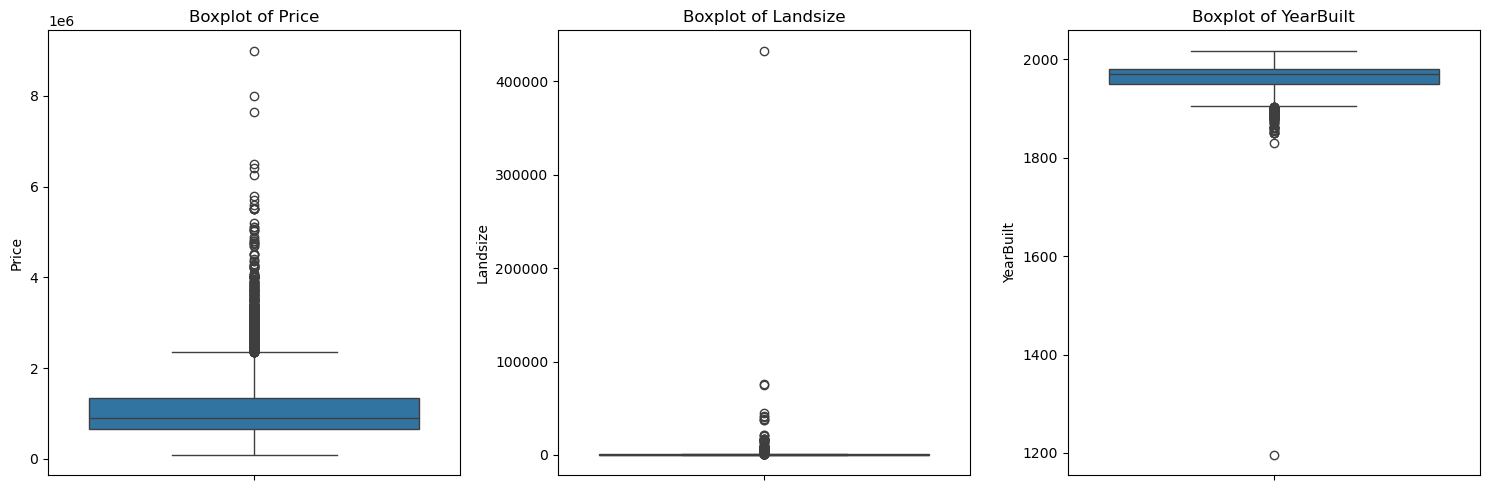

In [7]:
# Create boxplots for numerical columns
numerical_columns = ['Price', 'Landsize', 'YearBuilt']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [9]:
# Calculate IQR and flag outliers
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")


Price: 612 outliers detected
Landsize: 368 outliers detected
YearBuilt: 837 outliers detected


- Since Price and Landsize are continuous and likely have valid extreme values, capping ensures these outliers don’t overly affect results while keeping the data.
- I will also remove extreme outlier values in the `Yearbuilt` which might indicate properties built far out in the past or the future

In [8]:
# Capping Price and Landsize
for col in ['Price', 'Landsize']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


In [9]:
# Removing Outliers in the YearBuilt Column
Q1 = data['YearBuilt'].quantile(0.25)
Q3 = data['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['YearBuilt'] >= lower_bound) & (data['YearBuilt'] <= upper_bound)]


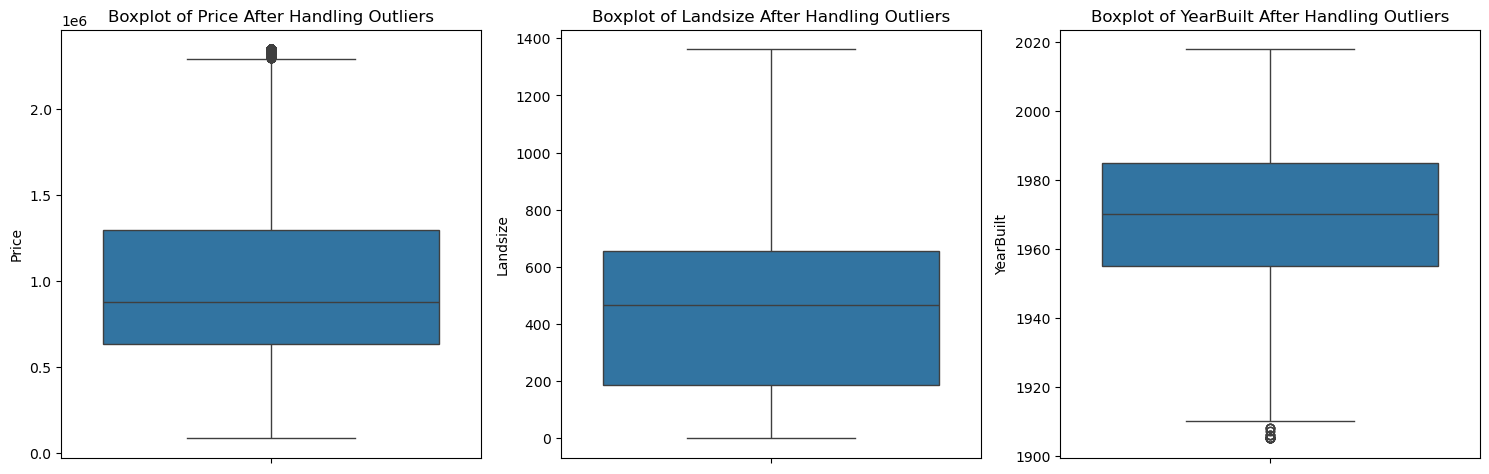

In [10]:
# Visualizing Boxplots After Handling Outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col} After Handling Outliers')
plt.tight_layout()
plt.show()


In [11]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,1935.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,1935.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,1935.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0


# Feature Creation

In [12]:
# Create the Price per Square Meter (Price_per_m2) feature
data['Price_per_m2'] = data['Price'] / data['Landsize']

# Check the first few rows to confirm the feature is added
print(data[['Price', 'Landsize', 'Price_per_m2']].head())

       Price  Landsize  Price_per_m2
0  1480000.0     202.0   7326.732673
3   850000.0      94.0   9042.553191
4  1600000.0     120.0  13333.333333
5   941000.0     181.0   5198.895028
6  1876000.0     245.0   7657.142857


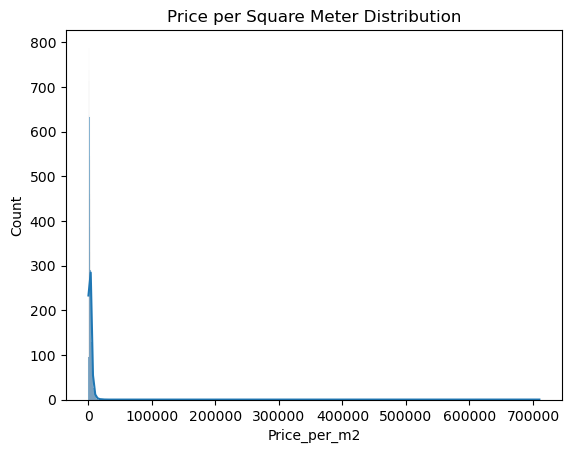

In [13]:
# Visualize the distribution of Price per Square Meter
sns.histplot(data['Price_per_m2'], kde=True)  # Or use a boxplot if you want to check for outliers
plt.title('Price per Square Meter Distribution')
plt.show()


In [14]:
# Apply One-Hot Encoding to 'Type', 'Method', and 'Regionname'
data = pd.get_dummies(data, columns=['Type', 'Method', 'Regionname'], drop_first=True)


In [15]:
# If Suburb is ordinal, encode it using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Assuming 'Suburb' is an ordinal feature (check if it has a hierarchy)
label_encoder = LabelEncoder()
data['Suburb'] = label_encoder.fit_transform(data['Suburb'])

# Correlation Analysis

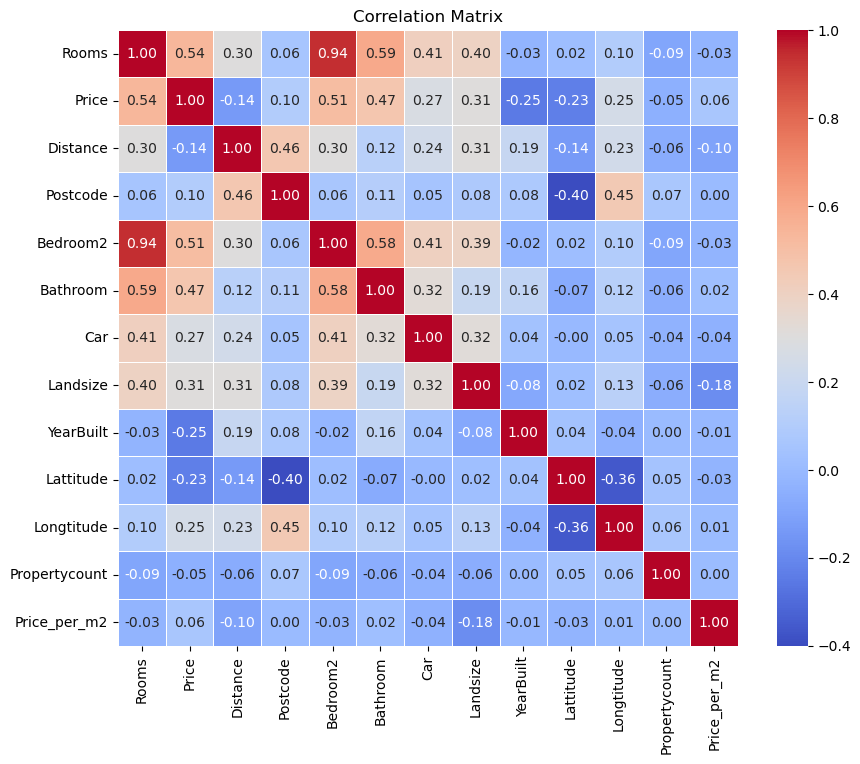

In [16]:
# Filter the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
corr_features = []

# Iterate over the rows of the correlation matrix
for i, r in correlation_matrix.iterrows():
    # Iterate over the values of the row (excluding the feature itself)
    for j in range(len(r)):
        # Skip if comparing the feature with itself
        if i != r.index[j]:
            # Check if the correlation is above the threshold of 0.5 (positive correlation)
            if abs(r[j]) >= 0.5:  # Use absolute correlation to catch both positive and negative correlations
                corr_features.append([i, r.index[j], r[j]])

# Print the highly correlated feature pairs
print(corr_features)

[['Rooms', 'Price', 0.5354740437578072], ['Rooms', 'Bedroom2', 0.9443985679429922], ['Rooms', 'Bathroom', 0.5933667692078342], ['Price', 'Rooms', 0.5354740437578072], ['Price', 'Bedroom2', 0.512468390983099], ['Bedroom2', 'Rooms', 0.9443985679429922], ['Bedroom2', 'Price', 0.512468390983099], ['Bedroom2', 'Bathroom', 0.5844456337167927], ['Bathroom', 'Rooms', 0.5933667692078342], ['Bathroom', 'Bedroom2', 0.5844456337167927]]


C:\Users\Yanny\AppData\Local\Temp\ipykernel_9556\1146621674.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(r[j]) >= 0.5:  # Use absolute correlation to catch both positive and negative correlations
C:\Users\Yanny\AppData\Local\Temp\ipykernel_9556\1146621674.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_features.append([i, r.index[j], r[j]])


In [18]:
threshold = 0.7

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Get the correlation matrix for numerical data
corr_matrix = numerical_data.corr().abs()

# Create a mask for the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Remove the identified features from the dataset
data_cleaned = data.drop(columns=to_drop)

# Print the removed features
print(f'Removed features: {to_drop}')


Removed features: ['Bedroom2']


## Insights from Correlation Analysis

The following are key insights derived from the correlation analysis of the dataset. Correlations with an absolute value greater than or equal to 0.5 are highlighted as significant.

### Strong Positive Correlations
1. **Rooms and Bedroom2**: Correlation = 0.9444
   - A very strong positive correlation, indicating that the number of rooms is highly associated with the number of bedrooms.

2. **Rooms and Bathroom**: Correlation = 0.5934
   - Properties with more rooms tend to have more bathrooms.

3. **Rooms and Price**: Correlation = 0.5727
   - Indicates that properties with more rooms are associated with higher prices.

4. **Bedroom2 and Bathroom**: Correlation = 0.5844
   - Suggests that properties with more bedrooms are likely to have more bathrooms.

5. **Bedroom2 and Price**: Correlation = 0.5486
   - Highlights a notable relationship where the number of bedrooms influences property prices.

### Strong Negative Correlations
1. **Landsize and Price_per_m2**: Correlation = -0.7812
   - A strong negative correlation indicates that larger landsize is associated with a lower price per square meter.

### Summary
- **Key variables influencing property prices**: Number of rooms, number of bedrooms, and number of bathrooms.
- **Property features**: Number of bedrooms and bathrooms are highly interrelated, with strong associations to the total number of rooms.
- **Price per square meter**: Inversely related to landsize, reaffirming that smaller properties tend to have a higher price per square meter.

## Scatter Plots

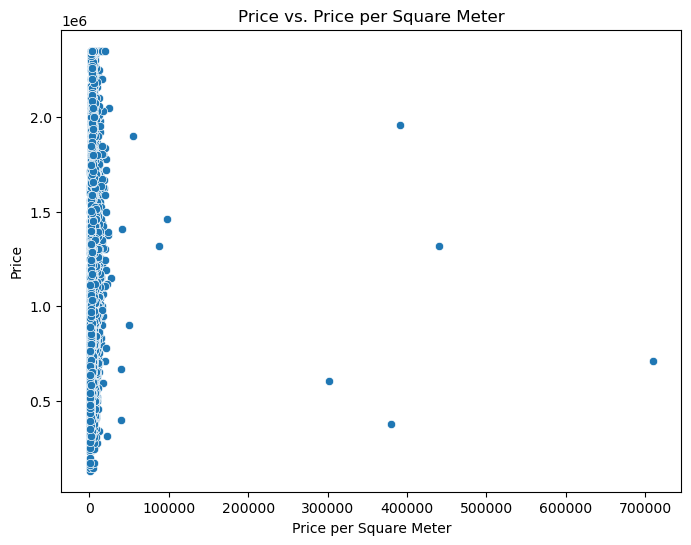

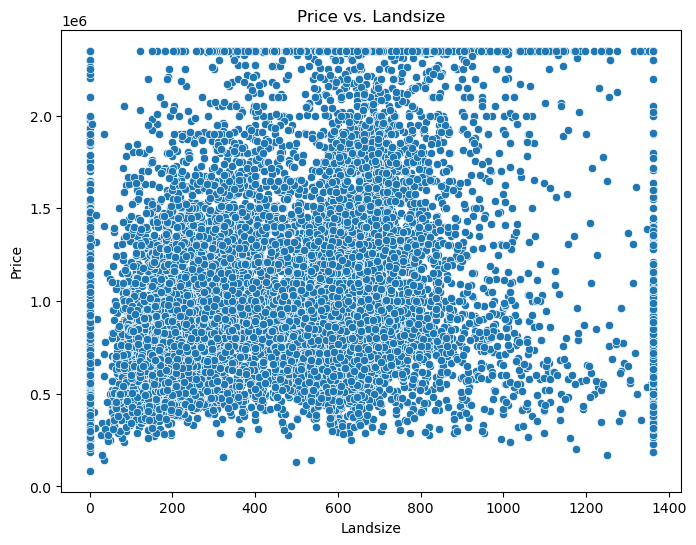

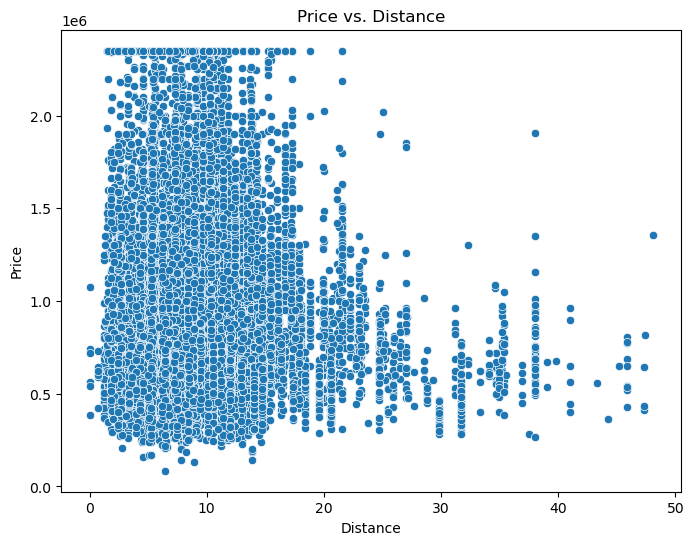

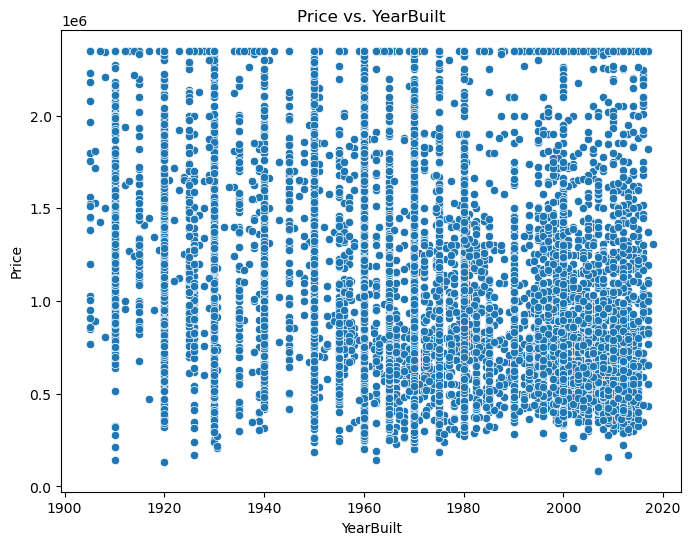

In [19]:
# Scatter plot for Price vs. Price_per_m2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price_per_m2'], y=data['Price'])
plt.title('Price vs. Price per Square Meter')
plt.xlabel('Price per Square Meter')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs. Landsize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Landsize'], y=data['Price'])
plt.title('Price vs. Landsize')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs. Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Distance'], y=data['Price'])
plt.title('Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs. YearBuilt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['YearBuilt'], y=data['Price'])
plt.title('Price vs. YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.show()


### Insights from Scatter Plots:

#### Price vs. Landsize:
- Larger properties tend to have higher prices, as this relationship is slightly linear.
- Most properties cluster around larger landsizes with a relatively high price range, indicating a tendency for larger landsizes to correspond to higher property prices.

#### Price vs. Price per Square Meter:
- Properties cluster tightly within a narrow range of price per square meter (e.g., 2.5 to 4.0 units), regardless of their total price.
- This suggests that smaller properties dominate the dataset, with varying price ranges clustering vertically between 12,500 and 14,500.

#### Price vs. Distance:
- While non-linear, the scatter plot shows horizontal clusters of properties, especially around distances of 5 to 15 units (likely kilometers).
- As distance increases, the number of properties (clusters) decreases, indicating fewer properties in distant locations.

#### Price vs. Year Built:
- Newer properties (recently built) tend to cluster within a similar higher price range.
- The relationship is non-linear, as prices vary less predictably for older properties.

# Building Baseline Model

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare features and target
X = data.drop(columns=['Price'])  # Drop the target variable 'Price'
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Dummy Regressor with the 'mean' strategy
dummy_model = DummyRegressor(strategy='mean')

# Train the baseline model
dummy_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = dummy_model.predict(X_test)

# Evaluate the baseline model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Baseline Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Baseline Model Performance:
Mean Absolute Error (MAE): 411410.55911187996
Root Mean Squared Error (RMSE): 516396.6490963668
R² Score: -0.0008762316934247671


# Building The Model Pipeline

In [21]:
print(X_train.dtypes)

Suburb                                     int32
Address                                   object
Rooms                                      int64
SellerG                                   object
Date                                      object
Distance                                 float64
Postcode                                 float64
Bedroom2                                 float64
Bathroom                                 float64
Car                                      float64
Landsize                                 float64
YearBuilt                                float64
CouncilArea                               object
Lattitude                                float64
Longtitude                               float64
Propertycount                            float64
Price_per_m2                             float64
Type_t                                      bool
Type_u                                      bool
Method_S                                    bool
Method_SA           

In [22]:
X_train = X_train.drop(columns=['CouncilArea',"Address","SellerG","Date"])
X_train.head()

,Suburb,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
9146,118,3,7.5,3040.0,3.0,2.0,1.0,276.0,1910.0,-37.75126,...,False,False,False,False,False,False,False,False,True,False
7839,122,3,12.4,3060.0,3.0,1.0,1.0,540.0,1960.0,-37.69920,...,False,False,False,False,True,False,False,False,False,False
1680,62,4,3.2,3054.0,4.0,2.0,0.0,538.0,2015.0,-37.78160,...,False,False,False,False,True,False,False,False,False,False
5950,270,3,12.6,3020.0,3.0,1.0,1.0,500.0,1955.0,-37.78210,...,False,False,False,False,False,False,False,False,True,False
13029,200,3,16.2,3094.0,3.0,1.0,2.0,204.0,2000.0,-37.72266,...,False,False,False,False,False,False,False,False,False,False


In [23]:
import warnings

# Suppress warnings
warnings.filterwarnings(action='ignore')

# Define the models and pipeline
sc = ('Scaler', StandardScaler())
models = [
    ('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])),
    ('Ridge', Pipeline([sc, ('Ridge', Ridge())])),
    ('Lasso', Pipeline([sc, ('Lasso', Lasso())])),
    ('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])),
    ('ElasticNet', Pipeline([sc, ('ElasticNet', ElasticNet())])),
    ('SGD', Pipeline([sc, ('SGD', SGDRegressor())])),
    ('Huber', Pipeline([sc, ('Huber', HuberRegressor())])),
    ('RANSAC', Pipeline([sc, ('RANSAC', RANSACRegressor())])),
    ('GradientBoosting', Pipeline([sc, ('GradientBoosting', GradientBoostingRegressor())])),
    ('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])),
    ('ExtraTree', Pipeline([sc, ('ExtraTrees', ExtraTreesRegressor())])),
    ('RandomForest', Pipeline([sc, ('RandomForest', RandomForestRegressor())])),
    ('Bagging', Pipeline([sc, ('Bagging', BaggingRegressor())])),
    ('KNeighbors', Pipeline([sc, ('KNeighbors', KNeighborsRegressor())])),
    ('DecisionTree', Pipeline([sc, ('DecisionTree', DecisionTreeRegressor())])),
    ('XGB', Pipeline([sc, ('XGB', XGBRegressor())]))
]




In [24]:
import numpy as np

# Check for NaN or infinity
if np.any(np.isnan(X_train)):
    print("X_train contains NaN values.")
if np.any(np.isinf(X_train)):
    print("X_train contains infinity values.")
if np.any(np.isneginf(X_train)):
    print("X_train contains negative infinity values.")

X_train contains infinity values.


In [25]:
# Identify columns with infinity
inf_columns = np.isinf(X_train).any(axis=0)
print("Columns with infinity values:", np.where(inf_columns)[0])

# Identify columns with NaN
nan_columns = np.isnan(X_train).any(axis=0)
print("Columns with NaN values:", np.where(nan_columns)[0])

Columns with infinity values: [12]
Columns with NaN values: []


In [26]:
X_train = X_train.drop(columns=['Price_per_m2'])
X_train.head()

,Suburb,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
9146,118,3,7.5,3040.0,3.0,2.0,1.0,276.0,1910.0,-37.75126,...,False,False,False,False,False,False,False,False,True,False
7839,122,3,12.4,3060.0,3.0,1.0,1.0,540.0,1960.0,-37.69920,...,False,False,False,False,True,False,False,False,False,False
1680,62,4,3.2,3054.0,4.0,2.0,0.0,538.0,2015.0,-37.78160,...,False,False,False,False,True,False,False,False,False,False
5950,270,3,12.6,3020.0,3.0,1.0,1.0,500.0,1955.0,-37.78210,...,False,False,False,False,False,False,False,False,True,False
13029,200,3,16.2,3094.0,3.0,1.0,2.0,204.0,2000.0,-37.72266,...,False,False,False,False,False,False,False,False,False,False


In [27]:
seed = 4
splits = 7
score = 'r2'
models_score = []

# Cross-validation for each model in the pipeline
for name, model in models:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=score)
    models_score.append((name, results.mean()))

# Displaying model performance
for model_name, score in models_score:
    print(f"{model_name}: {score:.4f}")

LinearRegression: 0.6796
Ridge: 0.6796
Lasso: 0.6796
BayesianRidge: 0.6796
ElasticNet: 0.6289
SGD: 0.6785
Huber: 0.6730
RANSAC: -0.2295
GradientBoosting: 0.8086
AdaBoost: 0.5392
ExtraTree: 0.8400
RandomForest: 0.8450
Bagging: 0.8283
KNeighbors: 0.7374
DecisionTree: 0.6838
XGB: 0.8487


### Observations

- **XGBoost** Performed the best with R^2 = 0.8487, followed by **Random Forest** (R^2 = 0.8450) and **ExtraTree** = 0.8400.

#  Hyperparameter Tuning for XGBoost

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'XGB__n_estimators': randint(50, 300),
    'XGB__learning_rate': uniform(0.01, 0.2),
    'XGB__max_depth': randint(3, 10),
    'XGB__subsample': uniform(0.7, 0.3),
    'XGB__colsample_bytree': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    estimator=Pipeline([sc, ('XGB', XGBRegressor())]),
    param_distributions=param_dist,
    n_iter=50,  # Limit the number of combinations
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END XGB__colsample_bytree=0.8123620356542087, XGB__learning_rate=0.20014286128198325, XGB__max_depth=5, XGB__n_estimators=121, XGB__subsample=0.8795975452591109; total time=   9.3s
[CV] END XGB__colsample_bytree=0.8123620356542087, XGB__learning_rate=0.20014286128198325, XGB__max_depth=5, XGB__n_estimators=121, XGB__subsample=0.8795975452591109; total time=   2.8s
[CV] END XGB__colsample_bytree=0.8123620356542087, XGB__learning_rate=0.20014286128198325, XGB__max_depth=5, XGB__n_estimators=121, XGB__subsample=0.8795975452591109; total time=   2.8s
[CV] END XGB__colsample_bytree=0.7468055921327309, XGB__learning_rate=0.041198904067240534, XGB__max_depth=5, XGB__n_estimators=252, XGB__subsample=0.9598528437324805; total time=  49.4s
[CV] END XGB__colsample_bytree=0.7468055921327309, XGB__learning_rate=0.041198904067240534, XGB__max_depth=5, XGB__n_estimators=252, XGB__subsample=0.9598528437324805; total time=  55.2s
[CV] E

# Feature Selection

## Recursive Feature Elimination (RFE)

In [29]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

# Initialize the model
model = XGBRegressor(
    colsample_bytree=0.8588951735068019,
    learning_rate=0.05837045818009034,
    max_depth=8,
    n_estimators=189,
    subsample=0.8674880360821292
)

# Initialize RFE
selector = RFE(estimator=model)  
selector.fit(X_train, y_train)

# If X_train is a DataFrame
if isinstance(X_train, pd.DataFrame):
    selected_features = X_train.columns[selector.support_]
else:
    selected_features = np.array(range(X_train.shape[1]))[selector.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'Lattitude', 'Longtitude', 'Type_t', 'Type_u',
       'Regionname_Northern Metropolitan', 'Regionname_Southern Metropolitan'],
      dtype='object')


# Training XGBoost Model with Selected Features

In [30]:
# Use only the selected features for training
X_train_selected = X_train[selected_features]

# Initialize the model with the best parameters found during RandomizedSearchCV
model = XGBRegressor(
    colsample_bytree=0.8588951735068019,
    learning_rate=0.05837045818009034,
    max_depth=8,
    n_estimators=189,
    subsample=0.8674880360821292
)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model using cross-validation (for consistency)
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, X_train_selected, y_train, cv=3, scoring='r2')

print(f"Cross-validated R2 score: {cv_results.mean():.4f}")


Cross-validated R2 score: 0.8501


# Model Evaluation

R2 Score: 0.8543
Mean Squared Error: 38814956235.4110


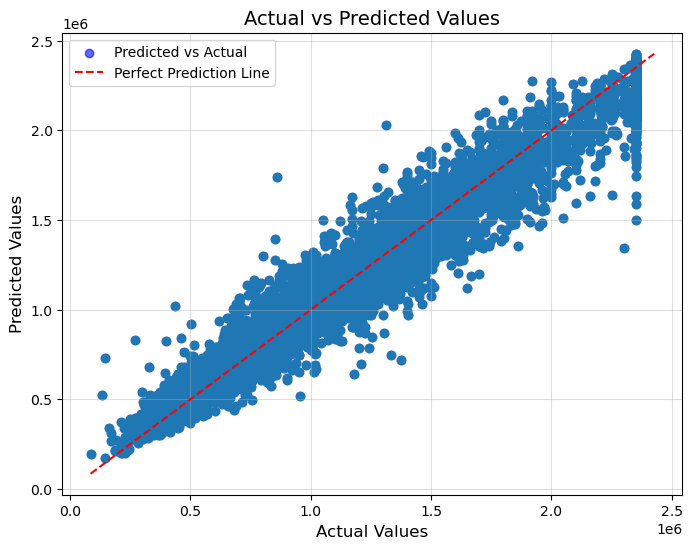

In [31]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the model with best hyperparameters
model = XGBRegressor(
    colsample_bytree=0.8588951735068019,
    learning_rate=0.05837045818009034,
    max_depth=8,
    n_estimators=189,
    subsample=0.8674880360821292
)

# Fit the model
model.fit(X_train_selected, y_train)

# Predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Predicting on the training set
y_pred = model.predict(X_train_selected)
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, c="blue",
            label="Predicted vs Actual", alpha=0.6)

# Adding a reference line: y = x
min_val = min(y_train.min(),
              y_pred.min())
max_val = max(y_train.max(),
              y_pred.max())
plt.plot([min_val,max_val], [min_val,max_val], color="red",linestyle="--",
         label="Perfect Prediction Line")

# Plotting Actual vs Predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values',fontsize=12)
plt.ylabel('Predicted Values',fontsize=12)
plt.title('Actual vs Predicted Values',fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [32]:
print("variance of y_train:",np.var(y_train))

variance of y_train: 266004052724.48508


### Model Performance Summary
The XGBoost model has performed really well:

- **Cross-validated R2 score: 0.8501**  
  This means that on average, the model is able to explain about 85.01% of the variance in the data during cross-validation. This is a solid result, showing that the model is doing a good job across different subsets of the training data.

- **Performance on unseen data:**
  - **R2 Score: 0.8543**  
    The model explains 85.43% of the variance in the test data, which is excellent. It means the model is generalizing well to new, unseen data.
  - **Mean Squared Error: 38,814,956,235.41**  
    The model's MSE reflects the average squared difference betweeen prediction and actual values. Though large in absolute terms, it accounts for only 14.6% of the target variance, confirming low prediction error relative to the dataset's scale.

# Saving The Model 

In [33]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)
